<a href="https://colab.research.google.com/github/ddiaz1999/Face_Mask_Detection_System/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>Face Mask Detection</strong>

*   **<font color='red'> Problema </font>** 
##### Detectar y clasificar la postura de una mascarilla sanitaria dentro de 3 clases.

<br>
<h6 align=center><b> ${\text{Tabla 1. Clases}}$ </b><h6>

|         ${\text{Class}}$         |      ${\text{Color Label}}$     |
|:--------------------------------:|:-------------------------------:|
|       ${\text{with mask}}$       |  $\color{green}{\text{green}}$  |
|     ${\text{without mask}}$      |    $\color{red}{\text{red}}$    |
| ${\text{mask weared incorrect}}$ | $\color{orange}{\text{orange}}$ |
<br>

*   **<font color='red'> Dataset </font>** 
##### El *dataset* es tomado de [<font color='purple'><i>**Kaggle**<i></font>](https://www.kaggle.com/), estos datos son de dominio público. [<font color='blue'><i>**Ver dataset**<i></font>](https://www.kaggle.com/andrewmvd/face-mask-detection)
<br>

---
---

#####Desarrollado por: 
<h6 align=center> ${\text{Jhon Hader Fernández}}$ <h6>
<h6 align=center> ${\text{Diego Fernando Díaz}}$ <h6>
<h6 align=center> ${\text{Oscar Geovanny Baracaldo}}$ <h6>

#####<h6 align=center>{<i>jhon_fernandez, di-diego, obaracaldo</i>}@javeriana.edu.co<h6>
#####<h6 align=center>Pontificia Universidad Javeriana<h6>

<br>

## ***1. ENTORNO DE TRABAJO***

Para el desarrollo del sistema se requiere de algunos paquetes, módulos y librerías externas.

### ***1.1.  INSTALACIÓN DE PAQUETES EXTERNOS*** 

In [ ]:
!pip install xmltodict

### ***1.2.  IMPORTAR PAQUETES Y LIBRERÍAS*** 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xmltodict
import time
import cv2
import os

from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from prettytable import PrettyTable

## ***2. ANÁLISIS DE DATOS***

Inicialmente se debe hacer un análisis exploratorio de los datos, que darán información sobre el tipo de datos, la cantidad, los formatos de archivos, etc.

### ***2.1.  OBTENER DATASET*** 

In [ ]:
path = '/content/drive/My Drive/Face Mask Detection/dataset'
folders = {'annotations':'annotations/', 'images':'images/'}

path_annotations = os.path.join(path, folders['annotations'])
path_images = os.path.join(path, folders['images'])

images_names = []
xml_names = []

for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    if os.path.join(dirname, filename)[-3:] == "png":
      images_names.append(filename)
    else:
      xml_names.append(filename)

print('Face Mask Detection: Dataset description')
chart = PrettyTable(["Folder", "Files amount", "format"])
chart.add_row([folders['annotations'][:-1], len(xml_names), xml_names[0][-3:]])
chart.add_row([folders['images'][:-1], len(images_names), images_names[0][-3:]])
print(chart,  '\n')

Face Mask Detection: Dataset description
+-------------+--------------+--------+
|    Folder   | Files amount | format |
+-------------+--------------+--------+
| annotations |     853      |  xml   |
|    images   |     853      |  png   |
+-------------+--------------+--------+ 



### ***2.2.  CONVERTIR UN ARCHIVO XML A DICCIONARIO*** 
A continuación se muestra un ejemplo de cómo convertir un archivo de tipo <font color='blue'>**`xml`**</font> en un diccionario (<font color='blue'>**`dict`**</font>). Este proceso es requerido para realizar todo el tratamiento de datos y mas adelante se utilizará bastante.

In [ ]:
image_test = images_names[1]

with open(path_annotations + image_test[:-4] + '.xml') as annotation:
    doc = xmltodict.parse(annotation.read())

print('Dictionary obtained from xml file:\n\n')
doc

Dictionary obtained from xml file:




OrderedDict([('annotation',
              OrderedDict([('folder', 'images'),
                           ('filename', 'maksssksksss455.png'),
                           ('size',
                            OrderedDict([('width', '301'),
                                         ('height', '400'),
                                         ('depth', '3')])),
                           ('segmented', '0'),
                           ('object',
                            OrderedDict([('name', 'without_mask'),
                                         ('pose', 'Unspecified'),
                                         ('truncated', '0'),
                                         ('occluded', '0'),
                                         ('difficult', '0'),
                                         ('bndbox',
                                          OrderedDict([('xmin', '115'),
                                                       ('ymin', '222'),
                                                

### ***2.3.  VER CLASES DISPONIBLES EN LOS DATOS*** 
Se revisa qué clases hay en todos los datos, debe ser consistente con el planteamiento inicial (***ver Tabla 1***)

In [ ]:
listing=[]

for idx, img in enumerate(images_names[:]):
  with open(path_annotations + img[:-4] + ".xml") as annotation:
    doc = xmltodict.parse(annotation.read())

  temp = doc['annotation']['object']

  if type(temp) == list:
    for i in range(len(temp)):
      listing.append(temp[i]['name'])
  else:
    listing.append(temp['name'])

  clear_output(wait=True)
  print('Loading images...')
  print('Image ' + str(idx + 1) + ' of ' + str(len(images_names)))
  time.sleep(0.005)

clear_output(wait=True)
listing = set(listing)

print('Classes available in dataset:', '\n')
listing

Classes available in dataset: 



{'mask_weared_incorrect', 'with_mask', 'without_mask'}

### ***2.4.  ASIGNAR UNA ETIQUETA DE COLOR A CADA CLASE*** 

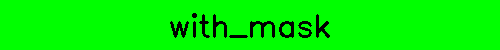

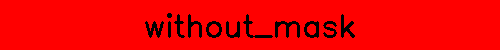

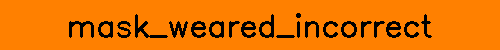

In [ ]:
classes_color = {'with_mask' : (0, 255, 0), 
                 'without_mask' : (0, 0, 255),
                 'mask_weared_incorrect' : (0, 128, 255)}

font, fontScale, thickness = cv2.FONT_HERSHEY_SIMPLEX, 1, 2
color = (0, 0, 0) 

for i, l in enumerate(classes_color):
  colors = np.ones((50, 500, 3), dtype=np.int16)
  colors *= classes_color[l]
  (label_width, label_height), baseline = cv2.getTextSize(l, font, fontScale, thickness)
  org = ((colors.shape[1]//2) - label_width//2, (colors.shape[0]//2) + label_height//2)
  colors = cv2.putText(colors, l, org, font, fontScale, color, thickness) 
  cv2_imshow(colors)

### ***2.5.  DIBUJAR OBJETOS EN IMÁGENES*** 
La función <font color='blue'>**`draw_bounding_box`**</font> dibuja un cuadro en los <font color='yellowgreen'>**objetos***</font> de interés.

<font color='yellowgreen'>**objetos**</font>: Se define como un rostro con alguna clase de interés (***ver Tabla 1***)



In [ ]:
def draw_bounding_box(input_image):
  with open(path_annotations + input_image[:-4] + ".xml") as annotation:
    doc = xmltodict.parse(annotation.read())
  temp = doc["annotation"]["object"]

  img = cv2.imread(os.path.join(path_images, input_image))

  if type(temp) == list:
    for i in range(len(temp)):

      if temp[i]["name"] == "with_mask":
        x_min, y_min, x_max, y_max = list(map(int,temp[i]["bndbox"].values()))
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color['with_mask'], 1)

      elif temp[i]["name"] == "without_mask":
        x_min, y_min, x_max, y_max = list(map(int,temp[i]["bndbox"].values()))
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color['without_mask'], 1)

      elif temp[i]["name"] == "mask_weared_incorrect":
        x_min, y_min, x_max, y_max = list(map(int,temp[i]["bndbox"].values()))
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color['mask_weared_incorrect'], 1)

      else:
        print('WARNING: Picture ' + input_image + ' has a invalid class!')
    
  else:
    x_min, y_min, x_max, y_max = list(map(int,temp["bndbox"].values()))
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color[temp["name"]], 1)
    temp = [0]

  print('Image: '+ input_image)
  print('Objects: ' + str(len(temp)))
  cv2_imshow(img)
  print('\n')

Image: maksssksksss451.png
Objects: 13


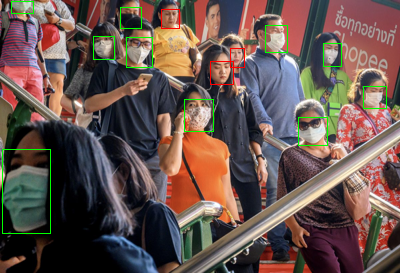



Image: maksssksksss455.png
Objects: 1


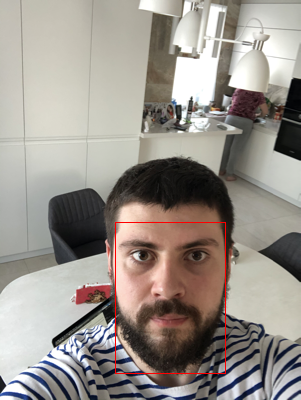



Image: maksssksksss456.png
Objects: 1


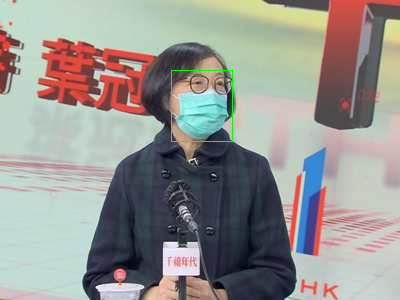

In [ ]:
number_of_images_to_draw = 3

for i in range(0, number_of_images_to_draw): 
  draw_bounding_box(images_names[i])

### ***2.5.  OBTENER LA MÁXIMA CANTIDAD DE OBJETOS***

Es importante obtener la máxima cantidad de objetos del *dataset*, es decir, habrá una o varias imágenes con un número máximo de objetos (con varias clases contenidas) es de interés conocer este número.


In [ ]:
def max_objects(images, verbose=False):
  number_of_objects = []
  for idx, img in enumerate(images):
    with open(path_annotations + img[:-4] + ".xml") as annotation:
      doc = xmltodict.parse(annotation.read())
    temp = doc['annotation']['object']
    number_of_objects.append(len(temp))
  
    if verbose:
      clear_output(wait=True)
      print('Loading images...')
      print('Image ' + str(idx + 1) + ' of ' + str(len(images)))
      time.sleep(0.01)
  
  clear_output(wait=True)
  return(max(number_of_objects))

print('Maximum number of objects is: ' + str(max_objects(images_names, verbose=True)))

Maximum number of objects is: 115


## ***3. PRE-PROCESAMIENTO DE DATOS***
Se debe ajustar y acondicionar los datos a los requerimientos del modelo.

### ***3.1.  OBTENER EL MARCO DE DATOS***

Se obtiene el *dataframe*.

In [ ]:
def get_dataFrame(images):

  dic = {"Image":[], "Dimensions":[]}
  max = max_objects(images)

  for i in range(0, max):
    dic['object'+str(i)] = []

  for idx, img in enumerate(images):
    with open(path_annotations + img[:-4] + ".xml") as annotation:
      doc = xmltodict.parse(annotation.read())

    temp = doc['annotation']['object']
    dic['Image'].append(img)
    (width, height, depth) = list(map(int,doc['annotation']['size'].values()))
    dic['Dimensions'].append((width, height, depth))

    if type(temp) == list:
      for i in range(len(temp)):
        x_min, y_min, x_max, y_max = list(map(int,temp[i]['bndbox'].values()))
        dic['object'+str(i)].append([temp[i]['name'], (x_min, y_min), (x_max, y_max)])
      for i in range (len(temp), max):
        dic['object'+str(i)].append(0)
    else:
      x_min, y_min, x_max, y_max = list(map(int,temp['bndbox'].values()))
      dic['object'+str(0)].append([temp['name'], (x_min, y_min), (x_max, y_max)])
      for i in range (1, max):
        dic['object'+str(i)].append(0)

    clear_output(wait=True)
    print('Loading images...')
    print('Image ' + str(idx + 1) + ' of ' + str(len(images)))
    time.sleep(0.01)
  
  clear_output(wait=True)
  return(pd.DataFrame(dic))

In [ ]:
df = get_dataFrame(images_names)

print('Dataframe dimensions: ' + str(df.shape) + '\n')
df.head()

Dataframe dimensions: (853, 117)



,Image,Dimensions,object0,object1,object2,object3,object4,object5,object6,object7,object8,object9,object10,object11,object12,object13,object14,object15,object16,object17,object18,object19,object20,object21,object22,object23,object24,object25,object26,object27,object28,object29,object30,object31,object32,object33,object34,object35,object36,object37,...,object75,object76,object77,object78,object79,object80,object81,object82,object83,object84,object85,object86,object87,object88,object89,object90,object91,object92,object93,object94,object95,object96,object97,object98,object99,object100,object101,object102,object103,object104,object105,object106,object107,object108,object109,object110,object111,object112,object113,object114
0,maksssksksss451.png,"(400, 273, 3)","[with_mask, (11, 1), (33, 13)]","[with_mask, (120, 7), (141, 28)]","[with_mask, (93, 36), (114, 59)]","[without_mask, (161, 9), (179, 28)]","[with_mask, (126, 37), (152, 67)]","[with_mask, (2, 149), (50, 233)]","[without_mask, (230, 48), (244, 67)]","[without_mask, (210, 61), (233, 84)]","[with_mask, (184, 99), (213, 131)]","[with_mask, (265, 25), (287, 52)]","[with_mask, (323, 43), (341, 66)]","[with_mask, (298, 117), (327, 145)]","[with_mask, (363, 86), (386, 108)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,maksssksksss455.png,"(301, 400, 3)","[without_mask, (115, 222), (225, 373)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,maksssksksss456.png,"(400, 300, 3)","[with_mask, (171, 70), (232, 141)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,maksssksksss453.png,"(400, 300, 3)","[without_mask, (2, 56), (16, 74)]","[without_mask, (18, 46), (37, 67)]","[without_mask, (46, 46), (59, 62)]","[without_mask, (50, 60), (59, 82)]","[without_mask, (19, 109), (32, 127)]","[with_mask, (26, 140), (49, 169)]","[mask_weared_incorrect, (47, 172), (71, 203)]","[without_mask, (97, 273), (131, 300)]","[without_mask, (108, 7), (120, 22)]","[without_mask, (111, 39), (127, 60)]","[without_mask, (133, 51), (146, 73)]","[without_mask, (147, 55), (159, 77)]","[without_mask, (97, 104), (114, 124)]","[with_mask, (124, 148), (143, 175)]","[with_mask, (158, 147), (175, 173)]","[without_mask, (193, 54), (206, 71)]","[without_mask, (208, 54), (219, 72)]","[with_mask, (229, 64), (241, 93)]","[without_mask, (261, 26), (279, 53)]","[without_mask, (296, 39), (310, 58)]","[with_mask, (344, 34), (365, 61)]","[with_mask, (339, 77), (359, 111)]","[without_mask, (108, 10), (122, 22)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,maksssksksss454.png,"(400, 278, 3)","[with_mask, (143, 97), (255, 211)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### ***3.2.  BALANCE***

Ver el balance de los datos.

In [ ]:
def get_balance(df):

  objects = df.columns.tolist()[2:]
  tags = []
  balance = {}

  for features in objects:
    series = df[features]
    for i in range(df.shape[0]):
      if series[i] != 0:
        tags.append(series[i][0])   

  balance['with_mask'] = tags.count('with_mask')
  balance['without_mask'] = tags.count('without_mask')
  balance['mask_weared_incorrect'] = tags.count('mask_weared_incorrect')

  balance['% with_mask'] = (balance['with_mask'] * 100.0) / len(tags)
  balance['% without_mask'] = (balance['without_mask'] * 100.0) / len(tags)
  balance['% mask_weared_incorrect'] = (balance['mask_weared_incorrect'] * 100.0) / len(tags)

  labels = 'with_mask', 'without_mask', 'mask_weared_incorrect'
  sizes = [balance['% with_mask'], balance['% without_mask'], balance['% mask_weared_incorrect']]
  colors = ['yellowgreen', 'crimson', 'orangered']
  explode = (0.1, 0.1, 0.0)

  fig, ax1 = plt.subplots(figsize = (18,9)) 
  ax1.pie(sizes, explode=explode, colors=colors, startangle=90, autopct='%.1f%%', pctdistance=0.85, shadow = True, textprops=dict(fontsize=17)) 
  plt.title('Data balance', fontsize=18, color='red') 
  ax1.legend(labels, title="Classes", loc='upper left', fontsize=12) 
  plt.tight_layout() 
  plt.show()

  chart = PrettyTable(["Class", "Amount", "Percentage %"])
  chart.add_row(['with_mask', balance['with_mask'], round(balance['% with_mask'],2)])
  chart.add_row(['without_mask', balance['without_mask'], round(balance['% without_mask'],2)])
  chart.add_row(['mask_weared_incorrect', balance['mask_weared_incorrect'], round(balance['% mask_weared_incorrect'],2)])
  chart.add_row(['---------------------','-----','------------'])
  chart.add_row(['Total', len(tags), 100])
  print(chart,  '\n')

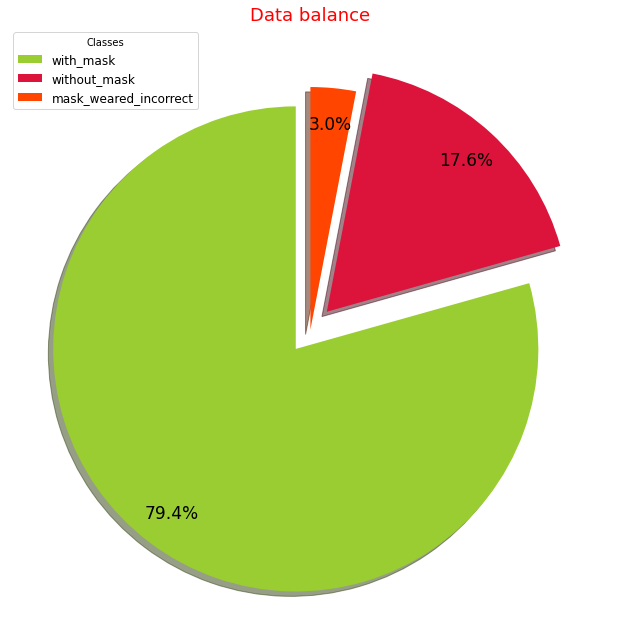

+-----------------------+--------+--------------+
|         Class         | Amount | Percentage % |
+-----------------------+--------+--------------+
|       with_mask       |  3232  |    79.37     |
|      without_mask     |  717   |    17.61     |
| mask_weared_incorrect |  123   |     3.02     |
| --------------------- | -----  | ------------ |
|         Total         |  4072  |     100      |
+-----------------------+--------+--------------+ 



In [ ]:
get_balance(df)

### ***3.3.  SEPARAR DATOS Y ETIQUETAS***

Se debe separar los datos y obtener su respectiva etiqueta (clase), para ello se extraen todos los objetos de cada imágen.

In [ ]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

def get_data(df):

  data = []
  labels = []

  for idx, image in enumerate(df['Image'][:]):

    img = cv2.imread(path_images + image)

    for obj in (df.columns[2:]):
      info = df[obj][idx]

      if info != 0:
        init_coor, end_coor = info[1:]
        x_min, y_min = init_coor[0], init_coor[1] 
        x_max, y_max = end_coor[0], end_coor[1] 
        
        face = img[y_min:y_max, x_min:x_max]

        data.append(face)
        labels.append(info[0])

    clear_output(wait=True)
    print('Getting data and labels...')
    print('Image ' + str(idx + 1) + ' of ' + str(df.shape[0]))
  
  clear_output(wait=True)        
  print('Data and labels was obtained successfully!')
  time.sleep(4)
  clear_output(wait=True)  
  return data, labels

In [ ]:
data, labels = get_data(df)

chart = PrettyTable(["File", "Amount"])
chart.add_row(['data', len(data)])
chart.add_row(['labels', len(labels)])
print(chart,  '\n')

+--------+--------+
|  File  | Amount |
+--------+--------+
|  data  |  4072  |
| labels |  4072  |
+--------+--------+ 



### ***3.4.  VISUALIZAR DATOS Y ETIQUETAS***

Observar algunos datos y sus respectiva etiqueta, además de mostrar la imágen original.

In [ ]:
def print_data(data, no_of_images):
  temp_prev = 0
  for image in (images_names[0:no_of_images]):
      
    with open(path_annotations + image[:-4] + ".xml") as annotation:
      doc = xmltodict.parse(annotation.read())
    temp = doc['annotation']['object']
    
    if type(temp) != list:
      temp = [0]  

    temp = len(temp)
    draw_bounding_box(image)

    for idx in range(temp_prev, temp_prev+temp):
      print('Object: ' + str((idx - temp_prev) + 1), ' --  Class: ' + labels[idx])
      print('(224, 224)')
      x = cv2.resize(data[idx], (224, 224))
      cv2_imshow(x)
    temp_prev += temp
    
    print('\n---------------------------------------------------------\n')

Image: maksssksksss451.png
Objects: 13


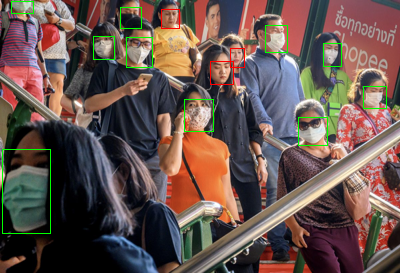



Object: 1  --  Class: with_mask
(224, 224)


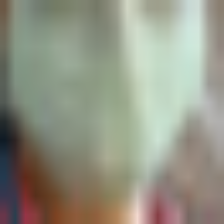

Object: 2  --  Class: with_mask
(224, 224)


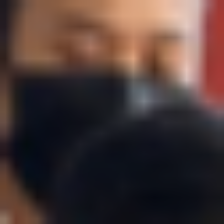

Object: 3  --  Class: with_mask
(224, 224)


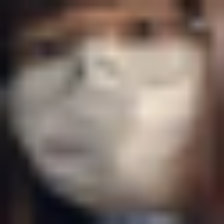

Object: 4  --  Class: without_mask
(224, 224)


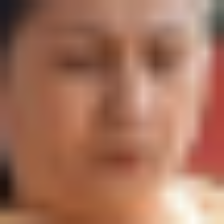

Object: 5  --  Class: with_mask
(224, 224)


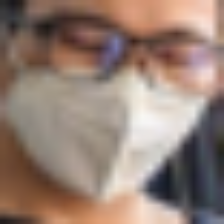

Object: 6  --  Class: with_mask
(224, 224)


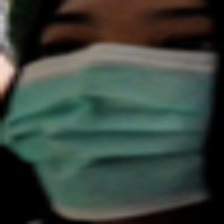

Object: 7  --  Class: without_mask
(224, 224)


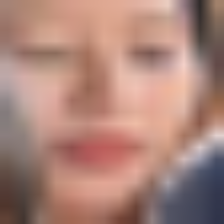

Object: 8  --  Class: without_mask
(224, 224)


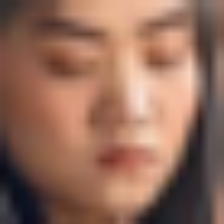

Object: 9  --  Class: with_mask
(224, 224)


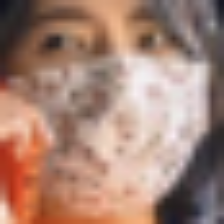

Object: 10  --  Class: with_mask
(224, 224)


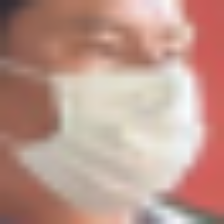

Object: 11  --  Class: with_mask
(224, 224)


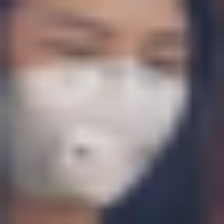

Object: 12  --  Class: with_mask
(224, 224)


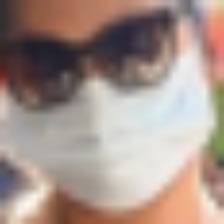

Object: 13  --  Class: with_mask
(224, 224)


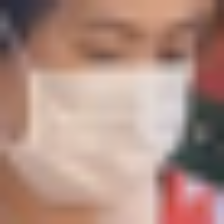


---------------------------------------------------------

Image: maksssksksss455.png
Objects: 1


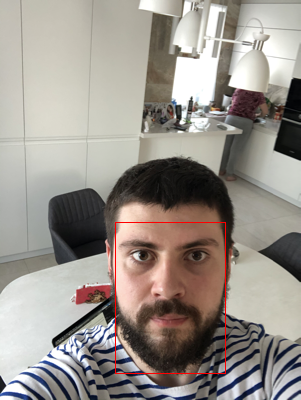



Object: 1  --  Class: without_mask
(224, 224)


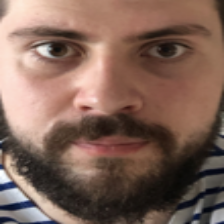


---------------------------------------------------------

Image: maksssksksss456.png
Objects: 1


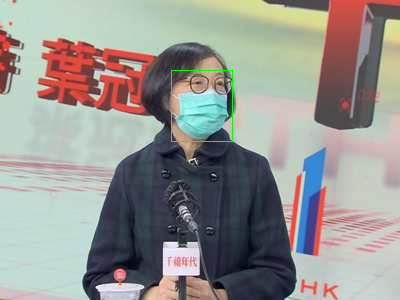



Object: 1  --  Class: with_mask
(224, 224)


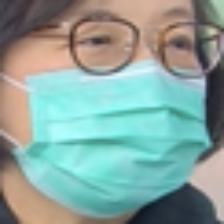


---------------------------------------------------------

Image: maksssksksss453.png
Objects: 23


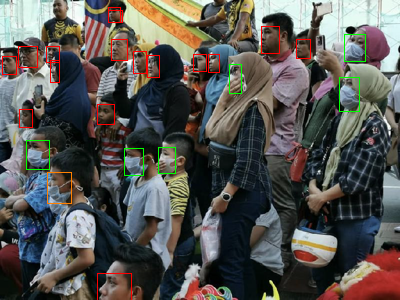



Object: 1  --  Class: without_mask
(224, 224)


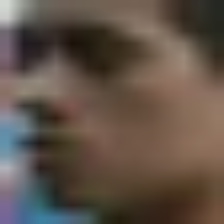

Object: 2  --  Class: without_mask
(224, 224)


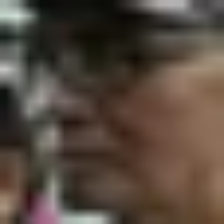

Object: 3  --  Class: without_mask
(224, 224)


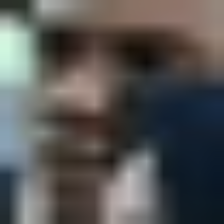

Object: 4  --  Class: without_mask
(224, 224)


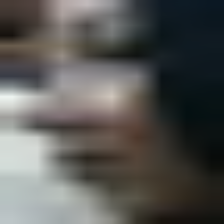

Object: 5  --  Class: without_mask
(224, 224)


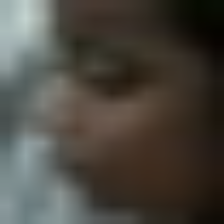

Object: 6  --  Class: with_mask
(224, 224)


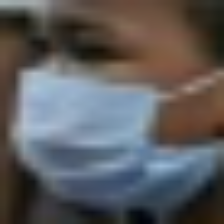

Object: 7  --  Class: mask_weared_incorrect
(224, 224)


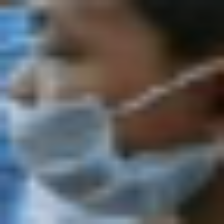

Object: 8  --  Class: without_mask
(224, 224)


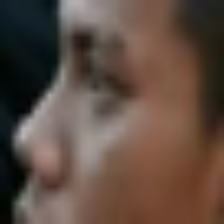

Object: 9  --  Class: without_mask
(224, 224)


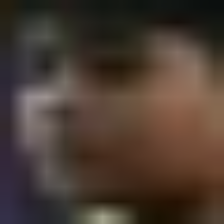

Object: 10  --  Class: without_mask
(224, 224)


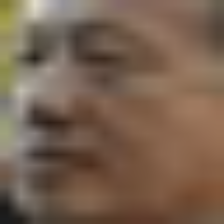

Object: 11  --  Class: without_mask
(224, 224)


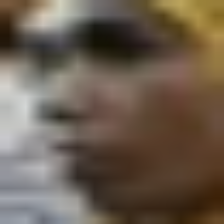

Object: 12  --  Class: without_mask
(224, 224)


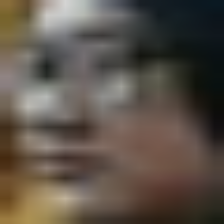

Object: 13  --  Class: without_mask
(224, 224)


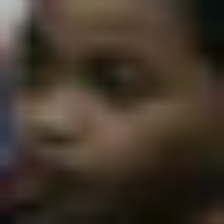

Object: 14  --  Class: with_mask
(224, 224)


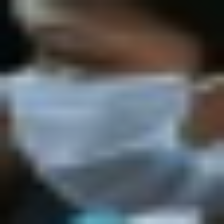

Object: 15  --  Class: with_mask
(224, 224)


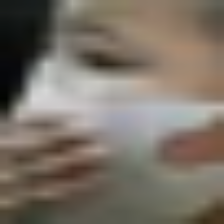

Object: 16  --  Class: without_mask
(224, 224)


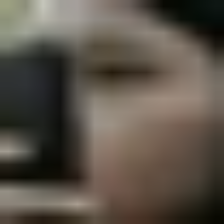

Object: 17  --  Class: without_mask
(224, 224)


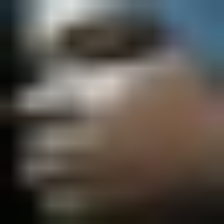

Object: 18  --  Class: with_mask
(224, 224)


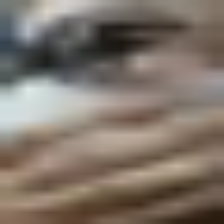

Object: 19  --  Class: without_mask
(224, 224)


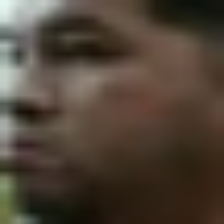

Object: 20  --  Class: without_mask
(224, 224)


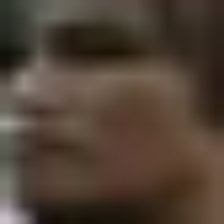

Object: 21  --  Class: with_mask
(224, 224)


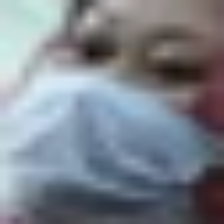

Object: 22  --  Class: with_mask
(224, 224)


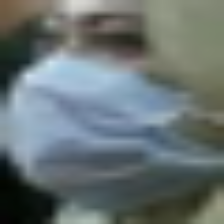

Object: 23  --  Class: without_mask
(224, 224)


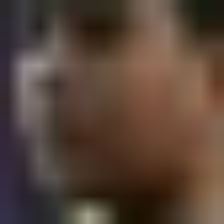


---------------------------------------------------------



In [ ]:
number_of_images_to_show_data_and_labels = 4
print_data(data, number_of_images_to_show_data_and_labels)

## ***4. MODELO***

## ***5. ENTRENAMIENTO***

## ***6. RESULTADOS***

In [ ]:
import os

path = 'path//'

images_names = []
folder_names = []

for dirname, _, filenames in os.walk(path):
  folder_names.append(dirnames)
  for i, filename in enumerate(filenames):
    old_file_name = path + filename
    new_file_name = path_images + 'maksssksksss' + str(853 + i) + '.png'
    os.rename(old_file_name, new_file_name)
    